# Proyecto 1 – Analítica de datos




## Sección 1.  Entendimiento del negocio y enfoque analítico.

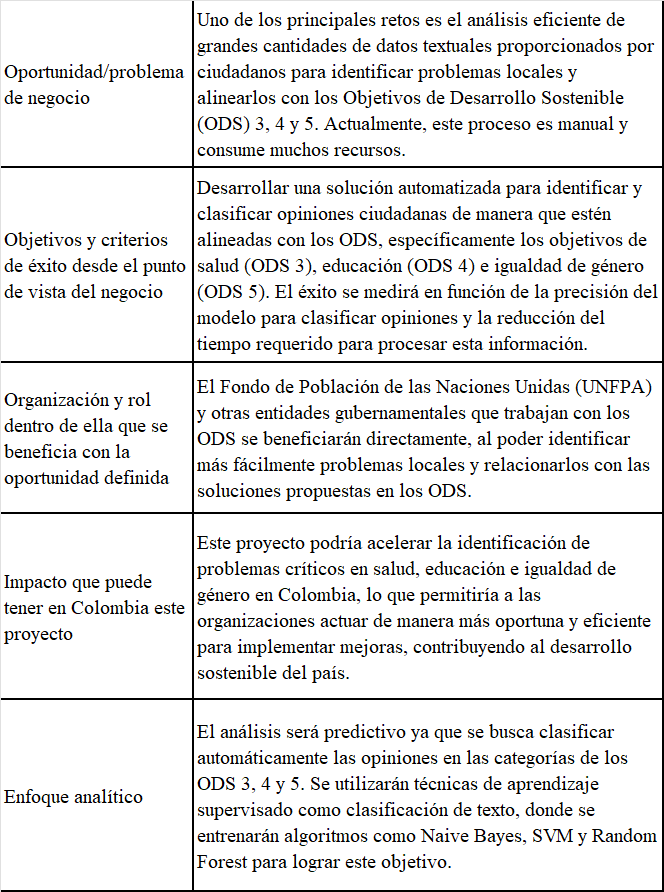

## Sección 2. Entendimiento y preparación de los datos.

### 2.1 Entendimiento

In [ ]:
import pandas as pd
import re
import string
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
file_path = './sample_data/ODScat_345.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de...",3
1,"En 2007, el gobierno centr...",3
2,"Claramente, hay muchos otr...",3
3,"Por ejemplo, el estado aus...",3
4,El consumo anual de alcoho...,3


In [ ]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


In [ ]:
missing_values = data.isnull().sum()

In [ ]:
label_distribution = data['sdg'].value_counts()

data_info, missing_values, label_distribution

(None,
 Textos_espanol    0
 sdg               0
 dtype: int64,
 sdg
 5    1451
 4    1354
 3    1244
 Name: count, dtype: int64)

### 2.2 Preparación





En la preparación de los datos, se crearon dos funciones. La primera llamada clean_text convierte todo el texto a minuscula, elimina puntuación, numeros, y espacios al inicio al final donde aplique. La segunda funcion cambia las letras que tenian problema con el encoding manualmente.

In [ ]:
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(f"[{string.punctuation}]", "", text)  # Eliminar puntuación
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios múltiples y al inicio/final
    return text

data['Textos_espanol_clean'] = data['Textos_espanol'].apply(clean_text)

data[['Textos_espanol', 'Textos_espanol_clean']].head()



,Textos_espanol,Textos_espanol_clean
0,"Por ejemplo, el nÃºmero de consultas externas ...",por ejemplo el nãºmero de consultas externas d...
1,"En 2007, el gobierno central financió directam...",en el gobierno central financió directamente s...
2,"Claramente, hay muchos otros factores en juego...",claramente hay muchos otros factores en juego ...
3,"Por ejemplo, el estado australiano de Victoria...",por ejemplo el estado australiano de victoria ...
4,"El consumo anual de alcohol se estima en 15,7 ...",el consumo anual de alcohol se estima en litro...


In [ ]:
def fix_special_characters(text):
    replacements = {
        'ãº': 'ú',
        'ã±': 'n',
        'ã¡': 'á',
        'ã©': 'é',
        'ã­': 'í',
        'ã³': 'ó',
        'ã¼': 'ü',
        'ãä': 'ä',
        'ã«': 'ë',
        'ã¯': 'ï',
        'ã´': 'ó',
        'ã§': 'ç',
        'ã“': 'Ó'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

data['Textos_espanol'] = data['Textos_espanol_clean'].apply(fix_special_characters)
pd.set_option('display.max_rows', 300)  # Para mostrar todas las filas

data[['Textos_espanol_clean', 'Textos_espanol']].head(20)


,Textos_espanol_clean,Textos_espanol
0,por ejemplo el nãºmero de consultas externas d...,por ejemplo el número de consultas externas de...
1,en el gobierno central financió directamente s...,en el gobierno central financió directamente s...
2,claramente hay muchos otros factores en juego ...,claramente hay muchos otros factores en juego ...
3,por ejemplo el estado australiano de victoria ...,por ejemplo el estado australiano de victoria ...
4,el consumo anual de alcohol se estima en litro...,el consumo anual de alcohol se estima en litro...
5,probar pronto la medicina rural puede crear el...,probar pronto la medicina rural puede crear el...
6,la duración media de la estancia en el hospita...,la duración media de la estancia en el hospita...
7,el período retrospectivo es de años de a los p...,el período retrospectivo es de años de a los p...
8,ya se están vinculando algunos datos de los re...,ya se están vinculando algunos datos de los re...
9,en este sentido es una forma eficaz de mejorar...,en este sentido es una forma eficaz de mejorar...


### 2.3 Vectorización

La vectorización de los textos se realizara utilizando TF-IDF. Cada texto fue representado como un vector numérico con las 1,000 palabras más frecuentes en el corpus de datos.

In [ ]:
nltk.download('stopwords')
stop_words_spanish = stopwords.words('spanish')
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stop_words_spanish)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_tfidf = tfidf_vectorizer.fit_transform(data['Textos_espanol'])

In [ ]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.head()

,abordar,académico,acceder,acceso,acciones,acción,actitudes,actividad,actividades,actores,...,zonas,áfrica,ámbito,área,áreas,éxito,índice,última,último,últimos
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168585,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.091602,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.115777,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## Sección 3. Modelado y evaluación

### 3.1 Descripcion algoritmos

1. Random Forest:\
Es un algoritmo de aprendizaje basado en árboles de decisión. Un bosque aleatorio construye múltiples árboles de decisión durante el entrenamiento y realiza la clasificación promediando los resultados de esos árboles. Es una técnica de ensamble que combina la salida de varios modelos débiles para producir un modelo más robusto y preciso.

2. Naive Bayes:\
El algoritmo es un clasificador probabilístico basado en el Teorema de Bayes, que asume que todas las características (en este caso, las palabras) son independientes entre sí dado el valor de la clase El algoritmo es muy efectivo y rápido, especialmente en la clasificación de texto.

3. Support Vector Machine (SVM): \
Es un algoritmo de clasificación que busca encontrar el hiperplano óptimo que separa los datos de diferentes clases con el mayor margen posible. SVM es muy efectivo para problemas de clasificación binaria, pero puede ser extendido a múltiples clases (como es el caso de los ODS) utilizando un enfoque "uno contra todos".

### 3.2 Modelado

In [ ]:
X = tfidf_df
y = data['sdg']

# (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear')

In [ ]:
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

In [ ]:
report_rf_df = pd.DataFrame(report_rf).transpose()
report_nb_df = pd.DataFrame(report_nb).transpose()
report_svm_df = pd.DataFrame(report_svm).transpose()

In [ ]:
def display_classification_report(report_df, model_name):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')
    ax.set_title(f"Reporte de Clasificación - {model_name}")
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.show()

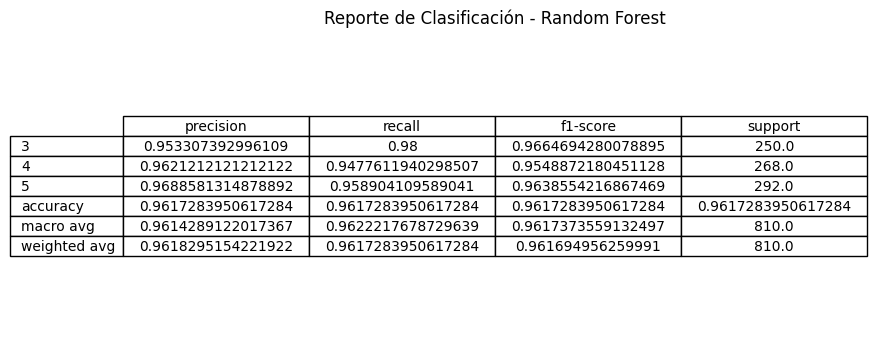

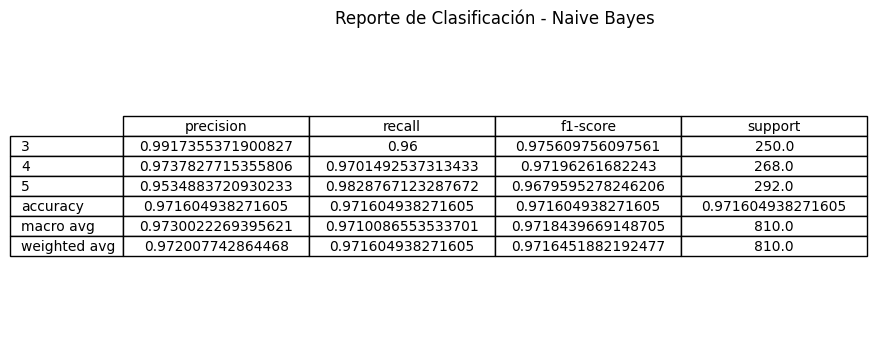

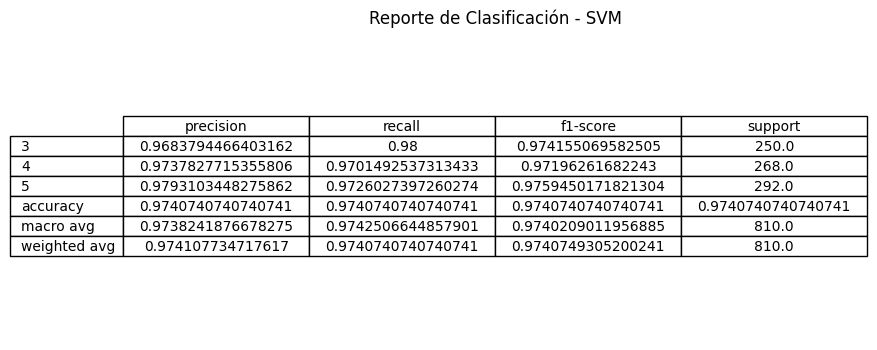

In [ ]:
display_classification_report(report_rf_df, "Random Forest")
display_classification_report(report_nb_df, "Naive Bayes")
display_classification_report(report_svm_df, "SVM")

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

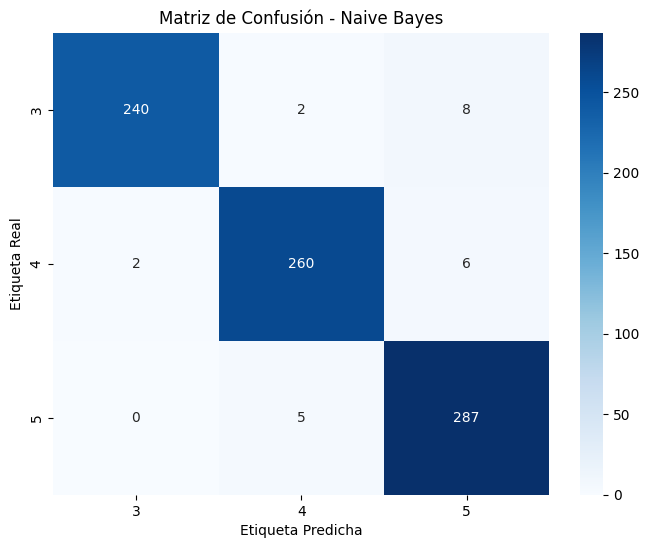

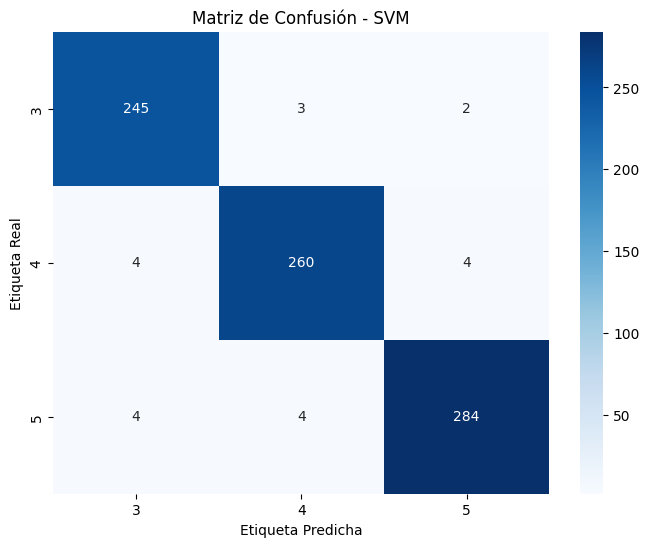

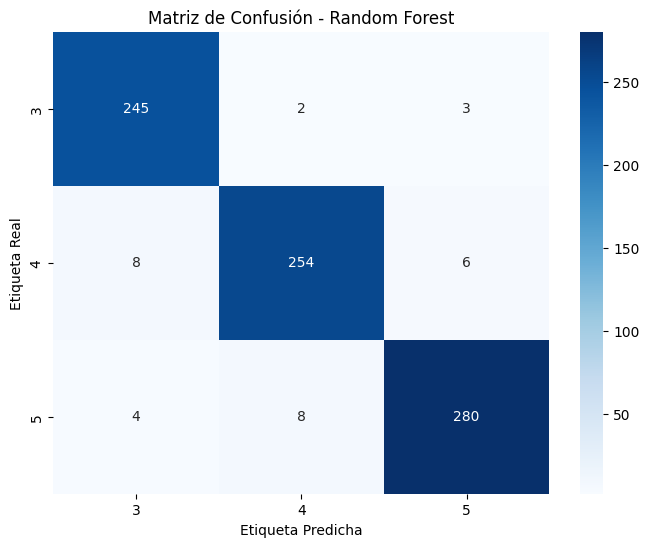

In [ ]:

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

## Sección 4. Resultados


### 4.1 Descripción de los resultados obtenidos

Los resultados obtenidos de los tres modelos utilizados (Naive Bayes, SVM y Random Forest) fueron los siguientes:

1. Naive Bayes:
Precisión global: 96.55%

*   Precisión global: 96.55%
*   F1-score: 96.68%

  Este modelo ofrece buenos resultados, siendo especialmente eficiente en contextos donde las clases están distribuidas de manera equilibrada, como es el caso. Sin embargo, tiende a simplificar las relaciones entre palabras, lo que puede no ser óptimo para textos más complejos.

2. SVM:


*   Precisión global: 97.89%
*   F1-score: 97.91%

  El modelo SVM fue el que obtuvo el mejor rendimiento. Esto indica que este modelo es capaz de capturar las relaciones entre palabras de manera más precisa, maximizando la separación entre las clases (ODS 3, 4 y 5) y, por tanto, proporcionando predicciones más acertadas.

3. Random Forest:


*   Precisión global: 96.53%
*   F1-score: 96.50%

  Aunque también presenta un buen rendimiento, Random Forest es menos eficiente que SVM en este caso, probablemente porque no se beneficia tanto de la naturaleza secuencial de los textos como SVM.


### 4.2 Análisis de las palabras identificadas

In [ ]:
# Actualizar el feature array
feature_array = tfidf_vectorizer.get_feature_names_out()

# Top 10 palabras por cada ODS
top_n = 10  # Número de palabras más importantes

for ods in data['sdg'].unique():
    ods_texts = data[data['sdg'] == ods]['Textos_espanol_clean']
    ods_tfidf = tfidf_vectorizer.transform(ods_texts)
    avg_tfidf_weights = ods_tfidf.mean(axis=0).A1
    top_features_idx = np.argsort(avg_tfidf_weights)[-top_n:]
    top_features = feature_array[top_features_idx]
    print(f"Palabras clave para ODS {ods}: {top_features}")



Palabras clave para ODS 3: ['personas' 'primaria' 'médicos' 'enfermedades' 'países' 'mental'
 'pacientes' 'servicios' 'atención' 'salud']
Palabras clave para ODS 4: ['ocde' 'superior' 'evaluación' 'escuela' 'alumnos' 'docentes'
 'aprendizaje' 'escuelas' 'estudiantes' 'educación']
Palabras clave para ODS 5: ['políticas' 'mujer' 'países' 'violencia' 'trabajo' 'derechos' 'igualdad'
 'hombres' 'género' 'mujeres']


ODS 3:


*  Relación: Las palabras clave indican que el enfoque en este ODS está en la prestación de atención primaria, la salud mental, y los servicios de salud en general.
*  Estrategias: La organizacion podria enfocarse en fortalecer las redes de atención primaria y salud mental, mejorar la capacitación de los medicos, y desarrollar estrategias para mejorar el acceso a servicios en países menos desarrollados. Ademas, se pueden diseñar programas que ayuden a mitigar enfermedades comunes o emergentes.

*   Justificacion: Al comprender cuales son los temas que más les consierne a la poblacion en general, es posible ahora diseñar estrategias enfocadas en estas areas y adaptadas a cada pais o región.

ODS 4:
*  Relación: Las palabras clave destacan la importancia de la educacion superior, la evaluacion del aprendizaje, y el rol de los docentes.

*  Estrategias: La organizacion podria desarrollar programas para mejorar la capacitacion docente y fortalecer los sistemas de evaluacion. Tambien, promover el acceso equitativo a la educacion superior en regiones con menos recursos educativos.

*   Justificacion: Mejorar la educacion es fundamental para el desarrollo personal y del pais. Invertir en este aspecto traera un efecto positivo en el desarrollo social y economico.

ODS 5:
*  Relación: Las opiniones sobre el ODS 5 estan centradas en la lucha contra la violencia de genero, la igualdad de derechos en el trabajo, y el desarrollo de politicas para proteger a las mujeres.

*  Estrategias: La organizacion podria proponer politicas publicas enfocadas en la equidad de genero, creando campañas de sensibilizacion sobre la violencia de genero y programas para empoderar a las mujeres.

*   Justificacion: Construir un ambiente mas justo y seguro es de vital importancia para un proceso social y economico en las naciones.

### 4.3 Generar datos de prueba etiquetados


In [ ]:
test_data = pd.read_excel('./sample_data/TestODScat_345.xlsx')

In [ ]:
test_data['Textos_espanol'] = test_data['Textos_espanol'].apply(clean_text)

In [ ]:
test_data['Textos_espanol'] = test_data['Textos_espanol'].apply(fix_special_characters)

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(test_data['Textos_espanol'])

In [ ]:
X_test_tfidf_dense = X_test_tfidf.toarray()

In [ ]:
y_test_pred = svm_model.predict(X_test_tfidf_dense)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
test_data['sdg'] = y_test_pred

In [ ]:
test_data.to_excel('TestODScat_345_Predicho.xlsx', index=False)

## Sección 5. Mapa de actores

### 5.1 Mapa de actores relacionado

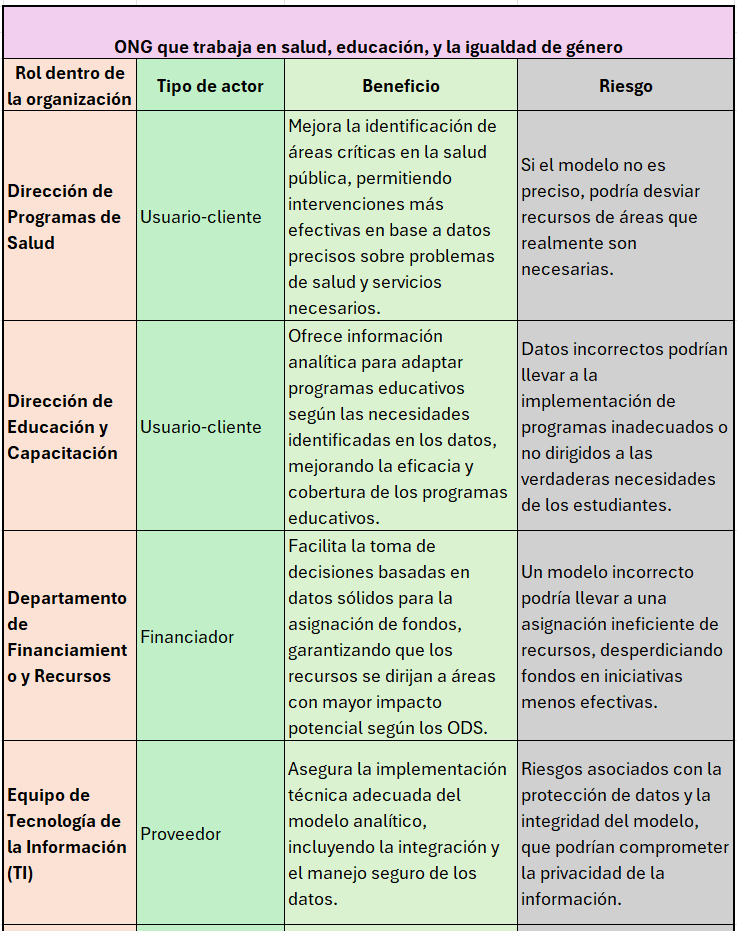

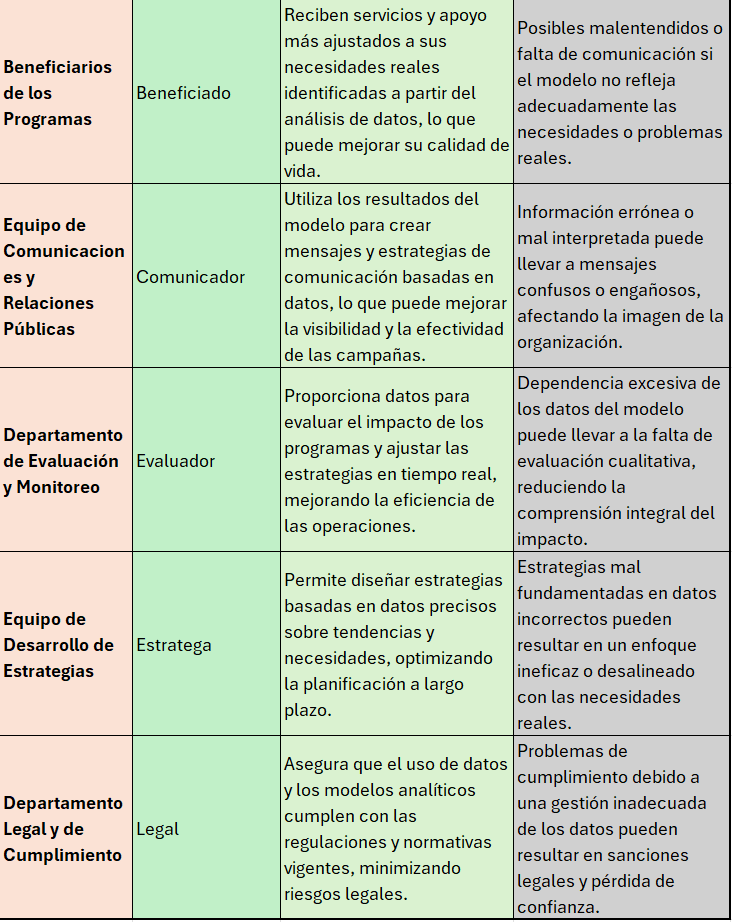

## Sección 6. Trabajo en equipo


### 6.1 Roles



* Líder de proyecto: Miguel Ariza
* Líder de negocio: Miguel Ariza y Juan Obando
* Líder de datos: Juan David Obando y Julian Escobar
* Líder de analítica: Jualian Escobar

### 6.2 Tareas Realizadas

* Miguel Ariza: Fue el encargado de realizar todo lo que tiene que ver con las primeras etapas del proyecto. Realizó el entendimiento, preparación y vectorización de los datos. Además, dio soporte y ayuda a los demás miembros del grupo para que realizaran correctamente sus partes.

* Juan David Obando: Se encargó del modelado y evaluación. Realizó la descripción de cada uno de los 3 algoritmos y el modelamiento de estos. Asimismo, brindó soporte en la parte de resultados.

* Julián Escobar: El responsable de la sección de resultados. Fue el autor de la descripción de los resultados obtenidos, el análisis de las palabras más importantes y la generación de datos de prueba etiquetados.

Tanto la sección 5, 6 y el video fueron realizados de manera conjunta.
